In [551]:
import pandas as pd
df=pd.read_csv("E:\\csv files\\car-price.csv")

In [552]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,5,27,0,1,0,0,0,2,0,2,...,18,5,23,4,13,5,10,8,10,13495
1,5,27,0,1,0,0,0,2,0,2,...,18,5,23,4,13,5,10,8,10,16500
2,3,27,0,1,0,0,2,2,0,10,...,28,5,1,27,13,20,10,6,9,16500
3,4,27,1,1,0,1,3,1,0,30,...,11,5,13,24,22,2,16,11,13,13950
4,4,27,1,1,0,1,3,0,0,28,...,22,5,13,24,5,8,16,5,5,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,49,21,1,0,1,3,2,0,46,...,24,5,35,15,20,7,15,10,11,16845
201,1,49,21,1,1,1,3,2,0,46,...,24,5,35,15,11,23,14,6,8,19045
202,1,49,21,1,0,1,3,2,0,46,...,33,5,26,7,12,13,16,5,6,21485
203,1,49,21,0,1,1,3,2,0,46,...,25,3,6,24,31,3,8,13,10,22470


In [553]:
data=df.values
data

array([[    5,    27,     0, ...,     8,    10, 13495],
       [    5,    27,     0, ...,     8,    10, 16500],
       [    3,    27,     0, ...,     6,     9, 16500],
       ...,
       [    1,    49,    21, ...,     5,     6, 21485],
       [    1,    49,    21, ...,    13,    10, 22470],
       [    1,    49,    21, ...,     6,     8, 22625]], dtype=int64)

In [554]:
x=[]
for i in range(len(data[0])-1):
    x.append(df.iloc[:,i])
x

[0      5
 1      5
 2      3
 3      4
 4      4
       ..
 200    1
 201    1
 202    1
 203    1
 204    1
 Name: symboling, Length: 205, dtype: int64, 0      27
 1      27
 2      27
 3      27
 4      27
        ..
 200    49
 201    49
 202    49
 203    49
 204    49
 Name: normalized-losses, Length: 205, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 200    21
 201    21
 202    21
 203    21
 204    21
 Name: make, Length: 205, dtype: int64, 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 200    1
 201    1
 202    1
 203    0
 204    1
 Name: fuel-type, Length: 205, dtype: int64, 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 200    0
 201    1
 202    0
 203    1
 204    1
 Name: aspiration, Length: 205, dtype: int64, 0      0
 1      0
 2      0
 3      1
 4      1
       ..
 200    1
 201    1
 202    1
 203    1
 204    1
 Name: num-of-doors, Length: 205, dtype: int64, 0      0
 1      0
 2      2
 3      3
 4     

In [555]:
target=df.iloc[:,-1]


In [556]:
import numpy as np
import copy 
def covariance(x,y):

    global covar1
    covar1=[]
    covar=0
    for i in range(len(data[0])-1):
        for j in range(len(df)):

            covar=((x[i][j])-x[i].mean())*(y[j]-y.mean())
            
            covar1.append(covar)
    
covariance(x,target)
sim=copy.deepcopy(covar1)
res=[]
for i in range(len(data[0])-1):
    res.append(sim[0:len(df)])
    del sim[0:len(df)]

real_covar1=[sum(i) for i in res]
real_covar1
print("Covariance:",real_covar1)

Covariance: [-174508.94146341435, 1103777.5512195118, -1704747.9512195115, -48930.024390243896, 114557.99512195117, 16842.741463414623, -121132.74634146338, 514801.531707317, 63409.05365853659, 12886102.687804881, 22318356.79024389, 12819333.814634161, 3370927.453658536, 62470597.351219505, 72930.05365853658, 1069740.2341463412, 14529210.0097561, 1725954.2634146342, 8956640.946341459, 610938.4243902441, -1110498.92195122, -9777534.30243902, -613178.4731707327, -7132015.570731703, -7020004.063414622]


In [557]:
import numpy as np
def variance(x):
    
    global var1
    var1=[]    
    for i in range(len(data[0])-1):
        for j in range(len(df)):
            
            var=(((x[i][j])-x[i].mean())**2)
            var1.append(var)
    
variance(x)
sim_var1=copy.deepcopy(var1)
res_var1=[]
for i in range(len(data[0])-1):
    res_var1.append(sim_var1[0:len(df)])
    del sim_var1[0:len(df)]
real_var1=[sum(i) for i in res_var1]
print("variance:",real_var1)
    

variance: [316.36097560975617, 41886.995121951244, 8032.1951219512175, 18.04878048780482, 30.321951219512233, 50.360975609755926, 150.5560975609758, 63.10243902439023, 2.956097560975603, 39812.71219512192, 91167.28780487803, 24060.89756097564, 35306.55609756097, 494732.9951219511, 226.95609756097593, 161.7756097560975, 24021.287804878004, 826.8097560975601, 20370.956097560967, 15106.84878048781, 10314.419512195145, 70361.58048780488, 5513.239024390238, 7955.190243902428, 7344.40975609756]


In [558]:
m=[real_covar1[i]/real_var1[i] for i in range(len(real_var1))]
print("SLOPE:",m)

SLOPE: [-551.6133623215212, 26.35131854185137, -212.23935989311303, -2710.987837837846, 3778.054858429852, 334.4403332041853, -804.5688504406417, 8158.187538651825, 21450.257425742624, 323.6680441324909, 244.80663325217094, 532.7870160349227, 95.475963284094, 126.27133821106995, 321.33991746550265, 6612.493909058016, 604.8472558080609, 2087.486571954503, 439.6770040368329, 40.441155747804906, -107.66470382925895, -138.96126600131828, -111.21927971163014, -896.5235716642126, -955.8295760372566]


In [559]:
intercept=[]
for i in range(len(data[0])-1):
    c=((target.mean())-(m[i]*(x[i].mean())))
    intercept.append(c)
print("INTERCEPT:",intercept)

INTERCEPT: [14955.001773213677, 12769.629119882835, 15979.933657233087, 15838.150000000009, 12709.755952380954, 13202.404494382023, 15495.301969932605, 2567.12677798392, 13077.742574257425, 6092.539668173145, 4637.124739650415, 3876.8523624202353, 11175.209223078033, 3036.7830894327, 12422.926492713754, -2059.007719213605, 3327.580538725386, 6599.680275640716, 5483.897005444865, 12611.233111520409, 14911.034088673396, 17725.88456006063, 14671.484296779197, 24254.890497628803, 26148.476683111876]


ACCURACY: -9.421425029201938


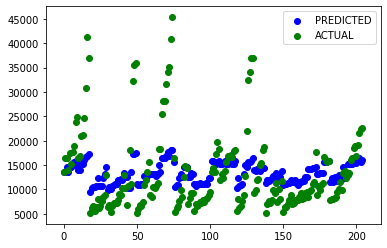

In [561]:
tar=[]
for i in range(len(x)):
    for j in range(len(df)):
        
        tar.append(m[i]*x[i][j]+intercept[i])
import copy 
fin_tar=copy.deepcopy(tar)


final=[]
for i in range(len(data[0])-1):
    final.append(fin_tar[0:len(df)])
    del fin_tar[0:len(df)]
pred1=[[row[i] for row in final] for i in range(len(df))]


pred=[(sum(i)/len(i)) for i in pred1]
from sklearn.metrics import r2_score
print("ACCURACY:",r2_score(pred,target))

c=[i for i in range(len(df))]
import matplotlib.pyplot as plt
plt.scatter(c,pred,color="blue",label="PREDICTED")
plt.scatter(c,target,color="green",label="ACTUAL")
plt.legend()